## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID column'EIN'. The column 'NAME'was used to train the model.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=['EIN'], axis=1)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Check the count of NAME
NAME_counts = application_df['NAME'].value_counts()
NAME_counts

NAME
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: count, Length: 19568, dtype: int64

In [5]:
# Choose a cutoff value and create a list of names_replace to be replaced
# use the variable name names_replace
NAME_replace = list(NAME_counts[NAME_counts<5].index)

In [6]:
# Replace in dataframe
for name in NAME_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

NAME
Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: count, Length: 403, dtype: int64

In [7]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

NAME                       403
APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
appl_counts = application_df['APPLICATION_TYPE'].value_counts()
appl_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = list(appl_counts[appl_counts < 500].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_counts_above_1 = class_counts.loc[class_counts > 1]
class_counts_above_1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = list(class_counts[class_counts < 100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_numeric = pd.get_dummies(application_df)
application_numeric.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [14]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_numeric.drop(['IS_SUCCESSFUL'], axis=1)
y = application_numeric['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [16]:
# Review number of features
print(len(X_train_scaled[0]))

452


In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
             input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\Yi\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │         9,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,391 (36.68 KB)

 Trainable params: 9,391 (36.68 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7129 - loss: 0.5731
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7948 - loss: 0.4441
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8018 - loss: 0.4244
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8025 - loss: 0.4232
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8028 - loss: 0.4207
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8023 - loss: 0.4189
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8053 - loss: 0.4145
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8010 - loss: 0.4171
Epoch 9/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8044 - loss: 0.4121
Epoch 10/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8011 - loss: 0.4218
Epoch 11/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8066 - loss: 0.4104
Epoch 12/100
858/858 ━━━━━━━━━━━━━━━━━━━━

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 2ms/step - accuracy: 0.7892 - loss: 0.4528
Loss: 0.45282983779907227, Accuracy: 0.7892128229141235


In [21]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
filename = 'AlphabetSoupCharity_Optimization.h5'
nn.save(filename)

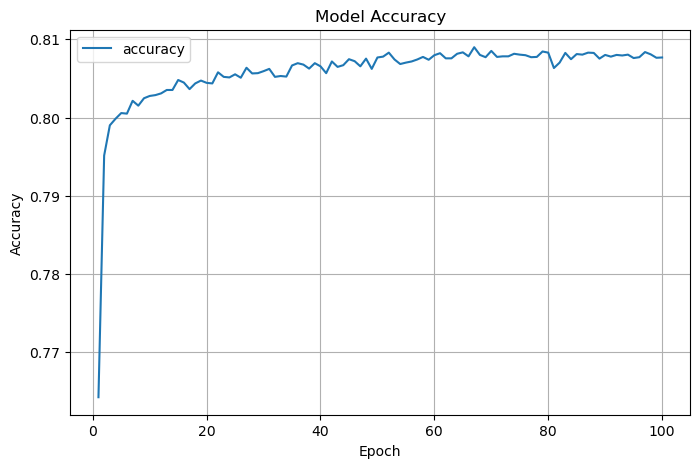

In [22]:
# Plot accuracy of the model
plot_df = pd.DataFrame(fit_model.history, index =  range(1, len(fit_model.history["loss"]) + 1))
plot_df.plot(y = "accuracy", figsize = (8, 5))
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("model_accuracy_opt.png")
plt.show()